In [1]:
#Imports
import math
import warnings
import numpy as np
import pandas as pd

from sklearn import linear_model
import statsmodels.api as sm
import statsmodels.formula.api as smf

#Plotting
from IPython.display import display
from matplotlib import pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format


# Suppress annoying harmless error.
warnings.filterwarnings(
    action="ignore",
    module="scipy",
    message="^internal gelsd"
)

In [2]:
crime_2013 = pd.read_csv('revised_crime_data_2013.csv')
crime_2013.head()

,City,Population,Violent_crime,Murder,Rape,Robbery,Aggrav_assault,Property_crime,Burglary,Larceny,Vehicle_theft
0,Adams Village,1861.000,0.000,0.000,0.000,0.000,0.000,12.000,2.000,10.000,0.000
1,Addison Town and Village,2577.000,3.000,0.000,0.000,0.000,3.000,24.000,3.000,20.000,1.000
2,Akron Village,2846.000,3.000,0.000,0.000,0.000,3.000,16.000,1.000,15.000,0.000
3,Albany,97956.000,791.000,8.000,30.000,227.000,526.000,4090.000,705.000,3243.000,142.000
4,Albion Village,6388.000,23.000,0.000,3.000,4.000,16.000,223.000,53.000,165.000,5.000


In [7]:
# Instantiate and fit our model.

# Note that the property_crime statistic is made from the burglary, larceny, and vehicle_theft columns
# so we don't include those
regr = linear_model.LinearRegression()
Y = crime_2013['Property_crime'].values.reshape(-1, 1)
linear_formula = 'Y ~ Population+Violent_crime+Murder+Rape+Robbery+Aggrav_assault'

# Fit the model to our data using the formula.
lm = smf.ols(formula=linear_formula, data=crime_2013).fit()


# Inspect the results.
print('\nCoefficients: \n', lm.params)
print('\nP-Values: \n', lm.pvalues)
print('\nR-squared: \n', lm.rsquared)


Coefficients: 
 Intercept          9.480
Population         0.014
Violent_crime     20.302
Murder            36.379
Rape              24.723
Robbery          -21.252
Aggrav_assault   -19.548
dtype: float64

P-Values: 
 Intercept        0.548
Population       0.000
Violent_crime    0.000
Murder           0.004
Rape             0.000
Robbery          0.000
Aggrav_assault   0.000
dtype: float64

R-squared: 
 0.9509826192386062


In [11]:
# Murder may or may not be statistically significant, but let's try without and see what happens

#Refit the model
linear_formula = 'Y ~ Population+Violent_crime+Rape+Robbery+Aggrav_assault'

# Fit the model to our data using the formula.
lm = smf.ols(formula=linear_formula, data=crime_2013).fit()

# Inspect the results.
print('\nCoefficients: \n', lm.params)
print('\nP-Values: \n', lm.pvalues)
print('\nR-squared: \n', lm.rsquared)


Coefficients: 
 Intercept          9.480
Population         0.014
Violent_crime     56.681
Rape             -11.656
Robbery          -57.631
Aggrav_assault   -55.927
dtype: float64

P-Values: 
 Intercept        0.548
Population       0.000
Violent_crime    0.000
Rape             0.518
Robbery          0.000
Aggrav_assault   0.000
dtype: float64

R-squared: 
 0.950982619238606


In [10]:
# We now have a big p-value for rape. I'll take that out, too. 

#Refit the model
linear_formula = 'Y ~ Population+Violent_crime+Robbery+Aggrav_assault'

# Fit the model to our data using the formula.
lm = smf.ols(formula=linear_formula, data=crime_2013).fit()

# Inspect the results.
print('\nCoefficients: \n', lm.params)
print('\nP-Values: \n', lm.pvalues)
print('\nR-squared: \n', lm.rsquared)


Coefficients: 
 Intercept          9.362
Population         0.013
Violent_crime     47.201
Robbery          -47.750
Aggrav_assault   -46.641
dtype: float64

P-Values: 
 Intercept        0.553
Population       0.000
Violent_crime    0.000
Robbery          0.000
Aggrav_assault   0.000
dtype: float64

R-squared: 
 0.9509225213660785


In [15]:
# Finally, since violent_crime is a combination of rape, murder, and aggravated_assault, we'll take that out too

#Refit the model
linear_formula = 'Y ~ Population+Robbery+Violent_crime+Aggrav_assault'

# Fit the model to our data using the formula.
lm = smf.ols(formula=linear_formula, data=crime_2013).fit()

# Inspect the results.
print('\nCoefficients: \n', lm.params)
print('\nP-Values: \n', lm.pvalues)
print('\nR-squared: \n', lm.rsquared)


Coefficients: 
 Intercept          9.362
Population         0.013
Robbery          -47.750
Violent_crime     47.201
Aggrav_assault   -46.641
dtype: float64

P-Values: 
 Intercept        0.553
Population       0.000
Robbery          0.000
Violent_crime    0.000
Aggrav_assault   0.000
dtype: float64

R-squared: 
 0.9509225213660786


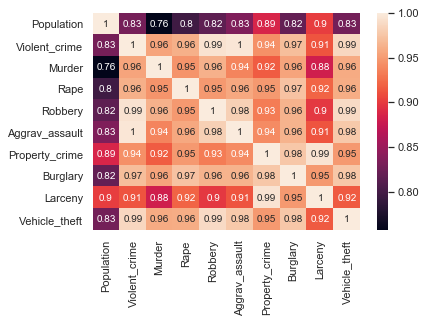

In [13]:
sns.heatmap(crime_2013.corr(), annot=True)
plt.show()

In [16]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     1657.
Date:                Wed, 20 Feb 2019   Prob (F-statistic):          2.26e-222
Time:                        09:19:31   Log-Likelihood:                -2377.6
No. Observations:                 347   AIC:                             4765.
Df Residuals:                     342   BIC:                             4784.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          9.3623     15.758      0.594      0.553     -21.633      40.358
Population         0.0134      0.001     16.140      0.000       0.012       0.015
Robbery          -47.7504      3.702    -12.899      0.000     -55.032     -40.469
Violent_crime     47.2005      3.393     13.911      0.000      40.527      53.874
Aggrav_assault   -46.6410      3.630    -12.848      0.000     -53.781     -39.501
==============================================================================
Omnibus:                      116.495   Durbin-Watson:                   2.028
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5775.362
Skew:                          -0.513   Prob(JB):                         0.00
Kurtosis:                      22.960   Cond. No.                     4.00e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  4e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Build the Model

In [20]:
#Sklearn

from sklearn.model_selection import GridSearchCV


parameters = {'normalize':[True,False]}

grid = GridSearchCV(regr, parameters, scoring='r2', cv=3, verbose=0)


Y = crime_2013['Property_crime'].values.reshape(-1, 1)
X = crime_2013[['Population', 'Robbery', 'Violent_crime', 'Aggrav_assault']]

#Fit the Data
grid.fit(X, Y)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'normalize': [True, False]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring='r2', verbose=0)

In [21]:
# Look at the R^2 score for reference
print("Model r2: \n", grid.score(X, Y))

Model r2: 
 0.9509225213660787


### Test the model on the same state, different year (2014 instead of 2013)

In [25]:
# import the data

data_2014 = pd.read_excel('Table_8_Offenses_Known_to_Law_Enforcement_by_New_York_by_City_2014.xls',
                        header=4, # Sets the header
                        skipfooter = 3)

# Do some quick cleaning so that our columns look the same, and remove new york city

data_2014 = data_2014.set_index('City')
data_2014.drop(columns=['Rape\n(revised\ndefinition)1', 'Arson3'], inplace=True)
data_2014.columns = ['Population', 'Violent_crime', 'Murder', 'Rape', 'Robbery', 'Aggrav_assault', 'Property_crime', 
              'Burglary', 'Larceny', 'Vehicle_theft']

data_2014 = data_2014.drop('New York4', axis='rows')

# Replace nans with 0s
data_2014 = data_2014.fillna(value=0)

# Convert all values to floats. Remove commas from larger numbers
for col in data_2014.columns:
    try:
        data_2014[col] = data_2014[col].apply(lambda x: float(x.replace(',', '')))
    except:
        data_2014[col] = data_2014[col].apply(lambda x: float(x))

In [26]:
data_2014.head()

,Population,Violent_crime,Murder,Rape,Robbery,Aggrav_assault,Property_crime,Burglary,Larceny,Vehicle_theft
City,,,,,,,,,,
Adams Village,1851.000,0.000,0.000,0.000,0.000,0.000,11.000,1.000,10.000,0.000
Addison Town and Village,2568.000,2.000,0.000,0.000,1.000,1.000,49.000,1.000,47.000,1.000
Afton Village4,820.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000
Akron Village,2842.000,1.000,0.000,0.000,0.000,1.000,17.000,0.000,17.000,0.000
Albany4,98595.000,802.000,8.000,0.000,237.000,503.000,3888.000,683.000,3083.000,122.000


In [27]:
# Putting the new data through the model
Y2 = data_2014['Property_crime'].values.reshape(-1, 1)
X2 = data_2014[['Population', 'Robbery', 'Violent_crime', 'Aggrav_assault']]

#Fit the Data
grid.fit(X2, Y2)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'normalize': [True, False]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring='r2', verbose=0)

In [28]:
print("Model r2: \n", grid.score(X, Y))

Model r2: 
 0.9215374160897921


Our R^2 score is lower, so we might have overfitting on our initial model. Let's try switching it up. Using the correlation map and previous p values, I'll choose this time to keep in population, burglary, vehicle theft, and aggravated assault

### Modify the original regression to fix overfitting 

In [35]:
# Instantiate and fit our model.

regr = linear_model.LinearRegression()
Y = crime_2013['Property_crime'].values.reshape(-1, 1)
linear_formula = 'Y ~ Population+Burglary+Vehicle_theft+Aggrav_assault'

# Fit the model to our data using the formula.
lm = smf.ols(formula=linear_formula, data=crime_2013).fit()


# Inspect the results.
print('\nCoefficients: \n', lm.params)
print('\nP-Values: \n', lm.pvalues)
print('\nR-squared: \n', lm.rsquared)


Coefficients: 
 Intercept        -13.494
Population         0.011
Burglary           3.970
Vehicle_theft     -3.242
Aggrav_assault    -0.606
dtype: float64

P-Values: 
 Intercept        0.183
Population       0.000
Burglary         0.000
Vehicle_theft    0.000
Aggrav_assault   0.046
dtype: float64

R-squared: 
 0.9800835471115038


In [36]:
# Remake the model

parameters = {'normalize':[True,False]}

grid = GridSearchCV(regr, parameters, scoring='r2', cv=3, verbose=0)


Y = crime_2013['Property_crime'].values.reshape(-1, 1)
X = crime_2013[['Population', 'Burglary', 'Vehicle_theft', 'Aggrav_assault']]

#Fit the Data
grid.fit(X, Y)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'normalize': [True, False]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring='r2', verbose=0)

In [37]:
print("Model r2: \n", grid.score(X, Y))

Model r2: 
 0.9800835471115038


### Test the revised model on our new data

In [39]:
# Putting the new data through the model
Y2 = data_2014['Property_crime'].values.reshape(-1, 1)
X2 = data_2014[['Population', 'Burglary', 'Vehicle_theft', 'Aggrav_assault']]

#Fit the Data
grid.fit(X2, Y2)



GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'normalize': [True, False]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring='r2', verbose=0)

In [40]:
print("Model r2: \n", grid.score(X2, Y2))

Model r2: 
 0.978515941672795


The model works and can explain variance in the data without overfitting